#### 张量
> 张量是所有机器学习系统的基本数据结构，它是一个数据容器。张量的维度通常叫坐轴(axis)，张量轴的个数也叫作阶（rank）。

In [2]:
#标量-0阶张量，仅包含一个数字的张量叫作标量（scalar）
import numpy as np
x=np.array(100)
print(x)
print(x.ndim)

100
0


In [3]:
#向量-1阶张量,数字组成的数组叫作向量（vector）
x=np.array([1,2,3,4,6])
print(x)
print(x.ndim)

[1 2 3 4 6]
1


In [4]:
#矩阵-2阶张量，向量组成的数组叫作矩阵（matrix）
x=np.array([[1,2,3,4,6],
            [4,5,6,7,8]])
print(x)
print(x.ndim)

[[1 2 3 4 6]
 [4 5 6 7 8]]
2


In [5]:
#3阶张量与更高阶的张量,将多个矩阵打包成一个新的数组，就可以得到一个3阶张量（或称为3维张量）,将3阶张量打包成一个数组就是4阶张量一次类推。
x = np.array([    [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
x.ndim

3

#### 张量的关键属性

In [6]:
from tensorflow.keras.datasets import mnist

#train_images是一个由8位整数组成的3阶张量。它是由60 000个矩阵组成的数组，每个矩阵由28×28个整数组成。每个这样的矩阵都是一张灰度图像，元素取值在0和255之间
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#轴的个数(阶数)
print(train_images.ndim)
#形状
print(train_images.shape)
#类型
print(train_images.dtype)

3
(60000, 28, 28)
uint8


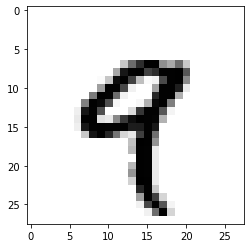

In [9]:
#显示第四个数字
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [10]:
train_labels[4]

9

#### 张量切片

In [11]:
#张量切片，选择第10-100个数字不包含第100个。
train_slice=train_images[10:100]
train_slice.shape

(90, 28, 28)

In [12]:
#同上
train_slice=train_images[10:100,:,:]
train_slice.shape

(90, 28, 28)

In [13]:
#同上
train_slice=train_images[10:100,:28,:28]
train_slice.shape

(90, 28, 28)

In [16]:
#从图像的右下角选出14像素 * 14像素的区域
train_slice=train_images[:,14:,14:]
train_slice.shape

(60000, 14, 14)

In [17]:
#同上，也可以使用负索引
train_slice=train_images[:,7:-7,7:-7]
train_slice.shape

(60000, 14, 14)

In [19]:
#批量处理，批量大小为128，有点类似分页。
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

#### 张量运算
> 计算机程序最终都可以简化为对二进制输入的运算（AND、OR、NOR等），深度神经网络的所有变换也可以简化为对数值数据张量运算（张量加法、张量乘法）。

In [21]:
#手写数字分类例子中的Dense层 layers.Dense(512, activation="relu") ，可以理解为一个函数，输入一个矩阵返回另外一个矩阵
#新表示等于output = relu(dot(input, W) + b),点积运算(dot),relu(x)就是max(x, 0)

#逐元素relu运算
def naive_relu(x):
    assert len(x.shape) == 2  
    x = x.copy()  
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x


#逐元素张量加法运算
def naive_add(x, y):
    assert len(x.shape) == 2 
    assert x.shape == y.shape
    x = x.copy() 
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x


In [23]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

#可以使用Numpy内置函数直接进行逐元素计算，速度非常快
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Numpy内置函数，Took: {0:.2f} s".format(time.time() - t0))

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("自定义函数，Took: {0:.2f} s".format(time.time() - t0))

Numpy内置函数，Took: 0.01 s
自定义函数，Took: 2.39 s


In [25]:
#广播，2阶张量与一个向量运算，较小的张量会被广播
x = np.random.random((64, 3, 32, 10)) # x是一个形状为(64, 3, 32, 10)的随机张量
y = np.random.random((32, 10))  # y是一个形状为(32, 10)的随机张量
z = np.maximum(x, y)  #输出z的形状为(64, 3, 32, 10)，与x相同
z.shape

(64, 3, 32, 10)

In [33]:
#张量点积运算(dot),数学符号中的点（•）表示点积运算。

#两个向量的点积是一个标量
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(z)

10.007641592795157


In [35]:
#一个矩阵和一个向量点积运算。返回值是一个向量
x = np.random.random((3, 32))
y = np.random.random((32,))
z = np.dot(x, y)
print(z)

[8.66304988 8.95061503 9.69167203]


In [37]:
#矩阵x和矩阵y的点积，仅当x.shape[1]==y.shape[0],才可以计算他们的点积。点积的结果形状为(x.shape[0],y.shape[1])
x = np.random.random((3, 3))
y = np.random.random((3, 3))
z = np.dot(x, y)
print(z)

[[0.19323267 0.14687725 0.15068107]
 [0.38395678 0.32128341 0.40041208]
 [0.55728594 0.19895482 0.66490868]]


In [39]:
#张量变形
x = np.random.random((3, 3))
print(x.shape)
y=x.reshape((9,1))
print(y.shape)
print(y)

(3, 3)
(9, 1)
[[0.94517213]
 [0.43176674]
 [0.64655291]
 [0.69730205]
 [0.80569054]
 [0.95255859]
 [0.50873799]
 [0.4425225 ]
 [0.51470789]]


In [40]:
#张量转置，行和列进行互换
x=np.zeros((300,20))
print(x.shape)
y=np.transpose(x)
print(y.shape)

(300, 20)
(20, 300)
